In [1]:
#Import the needed libraries
import numpy as np
from scipy.integrate import quad
import matplotlib.pylab as plt

from fakequadrature import quadrature_weights

In [2]:
# Define the test functions both with sympy and nympy used for the tests
def f_1(x):
    return np.sin(x)

def f_2(x):
    return np.log(x**4+4) + 7

def f(x):
    return f_1(x)*(x<=0) + f_2(x)*(x>0)

In [3]:
# Define the parameters
a, b = -2, 2 # Integration interval

k = 1.5 # The shift parameter

disc = 0 # The discontinuity location

ep = 1.e-13 # Parameter for identify the left and right discontinuity limits

alpha = np.abs(f(0)-f(0+ep)) # The jump magnitude

shift = k*alpha # The shift

LenFor = 40 # Maximum degree for the polynomial interpolation

In [4]:
# Define the mapping functions
def S(x):
    return x*(x<=0)+(x+shift)*(x>0)

def Sc(x):
    return -((b-a)/2)*np.cos(np.pi*(x-a)/(b-a)) + (b+a)/2

In [5]:
# Compute the true integral
lt, _ = quad(f_1, a, disc)
rt, _ = quad(f_2, disc, b)
Itrue = lt + rt

In [6]:
Err, ErrCL, Errf = [], [], [] # Initialize
# Compute the weights and approximate the integral

for Deg in np.arange(1,LenFor,2):
    # Define the degree and the equispaced nodes
    N_nodes = Deg+1
    x = np.linspace(a,b,N_nodes)
    # Define the CL nodes (for comparison)
    xCL = Sc(x)
    # Define the funtion values for equispaced and CL nodes
    y = f(x)
    yCL = f(xCL)
    # Compute the weights for standard and CL weights 
    # and for the fake nodes approach
    w = quadrature_weights(x, (a,disc)) + quadrature_weights(x, (disc,b))
    wf = quadrature_weights(x, (a,disc), mapping = S) + quadrature_weights(x, (disc,b), mapping = S)
    wCL = quadrature_weights(xCL, (a,disc)) + quadrature_weights(xCL, (disc,b))
    
    # Approximate the integrals
    I  = y.dot(w)
    If  = y.dot(wf)
    ICL  = yCL.dot(wCL)
    # Compute the errors
    err = np.abs(I-Itrue)
    errf = np.abs(If-Itrue)
    errCL = np.abs(ICL-Itrue)
    
    Err.append(err); ErrCL.append(errCL); Errf.append(errf)

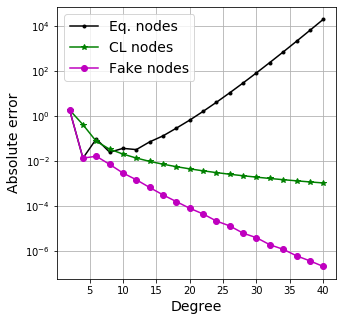

In [7]:
# Plotting tools
fig, ax = plt.subplots(1, 1,figsize=(5,5))
ax.cla()
asc = list(1+np.arange(1,LenFor,2))
ax.semilogy(asc,Err,'.-k',asc,ErrCL,'*-g',asc,Errf,'o-m')
ax.set_xlabel("Degree", fontsize = 14)
ax.set_ylabel("Absolute error", fontsize = 14)
ax.legend(["Eq. nodes","CL nodes","Fake nodes"],loc = 'best', fontsize = 14)
ax.grid(True)
plt.savefig("gibbsfig.png")
plt.show()